In [1]:
import requests
import json

In [2]:
####################

In [3]:
url = 'https://api.pushshift.io/reddit/search/comment/'
parameters = {'subreddit':'pokemon',
              'sort':'desc', # sort by comment time; most recent is first
              'size':500,
              'before':1581553020 # Wednesday, February 12, 2020 7:17:00 PM GMT-05:00
             }

In [4]:
import time

def get_data(url, parameters):
    poke_data = []
    epoch_time = 0
    current_size = 0
    while current_size < 500000:
        #print(parameters['before']) #make sure it's incrementing
        loop_set = json.loads((requests.get(url, params = parameters)).content)['data']
        poke_data.extend(loop_set) # list of dicts ; used extend instead of append 
                                   # so that dictionaries of next set of increments are added as separate dicts
                                   # instead of as a list of 500 dicts
        parameters['before'] = poke_data[-1]['created_utc'] # set comment time of oldest post of of set as the start point of next call
        current_size += parameters['size']
        
        #time.sleep(1) # if they ever rate-limit, use this to take pauses
    return poke_data

In [6]:
poke_data = get_data(url, parameters) # list of dicts

In [7]:
print(len(poke_data)) # check you got the correct number of comments back
# poke_data[0] # check format of data

500000


In [8]:
poke_data #list of dicts
poke_data[0]['created_utc'] > poke_data[1]['created_utc'] > poke_data[-1]['created_utc'] #first is most recent

True

In [9]:
def body_text_only(data): # get comment text only from list of dicts
    return list(map(lambda x: x['body'], data))

In [10]:
poke_comments = body_text_only(poke_data)

In [11]:
poke_data[-1]['created_utc'] # find epoch time of the oldest comment 
#Wednesday, December 4, 2019 1:38:31 PM GMT-05:00

1573797749

In [12]:
poke_data[0]['created_utc'] # Wednesday, February 12, 2020 5:36:34 PM GMT-05:00

1577839891

In [13]:
################

In [14]:
from bs4 import BeautifulSoup

In [15]:
req_dex = requests.get('https://pokemondb.net/pokedex/game/sword-shield')
req_dex.status_code

200

In [16]:
poke_soup = BeautifulSoup(req_dex.content, 'html.parser')
#poke_soup #look at data

In [17]:
html_poke = poke_soup.find_all(class_ = 'ent-name') # conveniently divided pokemon name to their own class
galar_poke = [html_poke[i].text for i in range(len(html_poke))] # list of all pokemon names as strings

In [18]:
####################### IN BETWEEN THESE # ARE THE UN-UPDATED CODE

In [19]:
def count_occurances(comments, the_pokemon = 'Corviknight'):
    count1 = list(filter(lambda x: the_pokemon.lower() in x.lower(), comments))
    return len(count1)

count_occurances(comments = poke_comments, the_pokemon = 'pikachu')

In [20]:
poke_count = dict.fromkeys(galar_poke, 0)

for i in galar_poke:
    poke_count[i] += count_occurances(comments = poke_comments, the_pokemon = i)
    
poke_count

{'Grookey': 791,
 'Thwackey': 83,
 'Rillaboom': 847,
 'Scorbunny': 1124,
 'Raboot': 180,
 'Cinderace': 1280,
 'Sobble': 1173,
 'Drizzile': 82,
 'Inteleon': 830,
 'Blipbug': 127,
 'Dottler': 66,
 'Orbeetle': 361,
 'Caterpie': 214,
 'Metapod': 148,
 'Butterfree': 1021,
 'Grubbin': 51,
 'Charjabug': 64,
 'Vikavolt': 135,
 'Hoothoot': 86,
 'Noctowl': 86,
 'Rookidee': 488,
 'Corvisquire': 122,
 'Corviknight': 1376,
 'Skwovet': 122,
 'Greedent': 190,
 'Pidove': 85,
 'Tranquill': 8,
 'Unfezant': 43,
 'Nickit': 184,
 'Thievul': 170,
 'Zigzagoon': 449,
 'Linoone': 209,
 'Obstagoon': 393,
 'Wooloo': 944,
 'Dubwool': 212,
 'Lotad': 138,
 'Lombre': 37,
 'Ludicolo': 273,
 'Seedot': 80,
 'Nuzleaf': 42,
 'Shiftry': 76,
 'Chewtle': 262,
 'Drednaw': 754,
 'Purrloin': 81,
 'Liepard': 78,
 'Yamper': 445,
 'Boltund': 316,
 'Bunnelby': 45,
 'Diggersby': 84,
 'Minccino': 64,
 'Cinccino': 27,
 'Bounsweet': 31,
 'Steenee': 12,
 'Tsareena': 80,
 'Oddish': 112,
 'Gloom': 70,
 'Vileplume': 81,
 'Bellossom': 51,


In [21]:
sorted_dict = {k:v for k,v in sorted(poke_count.items(), key = lambda poke_name: poke_name[1], reverse = True)}

In [22]:
sorted_dict

{'Natu': 6601,
 'Charizard': 4912,
 'Ditto': 4114,
 'Pikachu': 3677,
 'Eevee': 3467,
 'Eternatus': 1690,
 'Meowth': 1577,
 'Zacian': 1475,
 'Corviknight': 1376,
 'Magikarp': 1302,
 'Snorlax': 1283,
 'Cinderace': 1280,
 'Snom': 1240,
 'Sobble': 1173,
 'Gengar': 1133,
 'Scorbunny': 1124,
 'Dreepy': 1109,
 'Dragapult': 1097,
 'Gyarados': 1042,
 'Butterfree': 1021,
 'Rotom': 950,
 'Wooloo': 944,
 'Zamazenta': 928,
 'Charmander': 924,
 'Toxtricity': 884,
 'Rillaboom': 847,
 'Inteleon': 830,
 'Dracovish': 795,
 'Grookey': 791,
 'Drednaw': 754,
 'Lucario': 745,
 'Centiskorch': 713,
 'Gardevoir': 711,
 'Ponyta': 692,
 'Corsola': 680,
 'Tyranitar': 671,
 'Grimmsnarl': 654,
 'Alcremie': 648,
 'Falinks': 640,
 'Umbreon': 627,
 'Mimikyu': 624,
 'Lapras': 615,
 'Sylveon': 609,
 'Eiscue': 607,
 'Machamp': 605,
 'Appletun': 561,
 'Solrock': 547,
 'Gallade': 542,
 'Hatterene': 520,
 'Aegislash': 518,
 'Applin': 507,
 'Coalossal': 493,
 'Rookidee': 488,
 'Vulpix': 484,
 'Arcanine': 475,
 'Flapple': 472

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


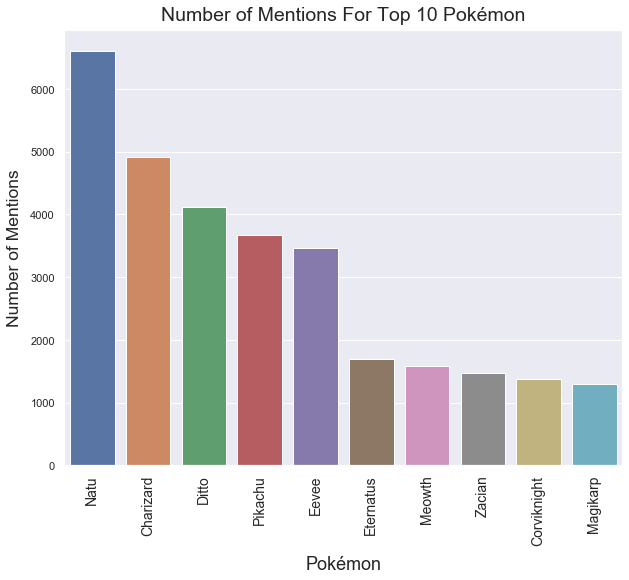

In [25]:
freq_plot = sns.barplot(x = list(sorted_dict.keys())[0:10], y = list(sorted_dict.values())[0:10])
sns.set_style("darkgrid")#, {'grid.linestyle':'-'})
freq_plot.set_xticklabels(freq_plot.get_xticklabels(), rotation = 90, fontdict = {'fontsize':14}) # x-tick label info
freq_plot.axes.set_title('Number of Mentions For Top 10 Pokémon', fontsize = 19.5, pad = 10) # title info
freq_plot.set_xlabel('Pokémon', fontsize = 18, labelpad = 10) # xlabel info
freq_plot.set_ylabel('Number of Mentions', fontsize = 17.5, labelpad = 8) # ylabel info

sns.set(rc = {'figure.figsize':(10,8)})
plt.show()

In [26]:
########################

In [27]:
indices = [i for i, x in enumerate(poke_comments) if 'natu' in x.lower()]

In [28]:
indices

[0,
 139,
 304,
 368,
 585,
 652,
 654,
 708,
 831,
 941,
 996,
 1036,
 1085,
 1534,
 1563,
 1564,
 1611,
 1714,
 1850,
 1869,
 1908,
 1923,
 1931,
 1945,
 2050,
 2069,
 2231,
 2266,
 2404,
 2585,
 2713,
 2791,
 2853,
 2895,
 3184,
 3525,
 3877,
 3930,
 3974,
 4406,
 4466,
 4483,
 4725,
 4781,
 5040,
 5051,
 5067,
 5111,
 5196,
 5467,
 5472,
 5565,
 5675,
 5791,
 5885,
 5928,
 5967,
 5990,
 6011,
 6152,
 6171,
 6346,
 6362,
 6416,
 6483,
 6639,
 6737,
 6778,
 6912,
 7212,
 7221,
 7229,
 7238,
 7261,
 7304,
 7464,
 7488,
 7580,
 7589,
 7917,
 7994,
 8050,
 8223,
 8327,
 8572,
 8748,
 8807,
 8878,
 9036,
 9171,
 9202,
 9259,
 9388,
 9421,
 9443,
 9461,
 9488,
 9530,
 9535,
 9641,
 9665,
 9743,
 9749,
 9904,
 10049,
 10236,
 10392,
 10434,
 10585,
 10861,
 11270,
 11377,
 11581,
 11724,
 11752,
 11915,
 12031,
 12085,
 12096,
 12120,
 12167,
 12252,
 12267,
 12317,
 12690,
 12704,
 12731,
 13103,
 13155,
 13248,
 13319,
 13332,
 13336,
 13391,
 13404,
 13430,
 13470,
 13843,
 14095,
 1424

In [29]:
[poke_comments[i] for i in indices[0:10]]

['Happy New Year!\n\nNowadays we get leaked images from CoroCoro Magazine and data mines for gossip about upcoming games but back in the day speculation came from rumours and demo footage.\n\n"Pikablu" was one that took the world by storm. With people already desperately searching under trucks for Mew it was only natural whispers of using Water Stones on Pikachus or talking to Prof. Oak hundreds of times would make sense to try.\n\nThen [images like these circulated](https://vignette.wikia.nocookie.net/pokegods/images/3/34/Pikablu.png/revision/latest?cb=20171205000451) which only fueled the fire. We can see what the [original in the demo](https://tcrf.net/images/1/15/PokeGoldDemo-front_179.png) appeared as, and many more from the [recently discovered beta artwork](https://tcrf.net/Proto:Pok%C3%A9mon_Gold_and_Silver/Pok%C3%A9mon#Demo_152-251).\n\n[Full gallery](https://imgur.com/a/B3RaM5a)',
 'Silver, Natural Harmonia Gropius, and Gladion were great in the character development area, an

In [ ]:
######################### BELOW IS UPDATED CODE

In [63]:
def count_occurances2(comments, the_pokemon = 'Corviknight'):
    import re
    count2 = list(filter(lambda x: bool(re.search(rf'\b{the_pokemon.lower()}\b', x.lower())), comments))
    return len(count2)

In [68]:
import re 
the_pokemon = 'charizard'
x = 'is the word charizardsdf, in this string?'
print(bool(re.search(rf'\b{the_pokemon.lower()}\b', x.lower())))
print(bool(re.search(r'\bcharizard\b', x.lower())))

False
False


In [69]:
poke_count2 = dict.fromkeys(galar_poke, 0)

for i in galar_poke:
    poke_count2[i] += count_occurances2(comments = poke_comments, the_pokemon = i)
    
poke_count2

{'Grookey': 745,
 'Thwackey': 83,
 'Rillaboom': 834,
 'Scorbunny': 1102,
 'Raboot': 176,
 'Cinderace': 1271,
 'Sobble': 1104,
 'Drizzile': 82,
 'Inteleon': 825,
 'Blipbug': 120,
 'Dottler': 63,
 'Orbeetle': 356,
 'Caterpie': 199,
 'Metapod': 134,
 'Butterfree': 986,
 'Grubbin': 41,
 'Charjabug': 64,
 'Vikavolt': 135,
 'Hoothoot': 85,
 'Noctowl': 85,
 'Rookidee': 445,
 'Corvisquire': 118,
 'Corviknight': 1344,
 'Skwovet': 112,
 'Greedent': 184,
 'Pidove': 81,
 'Tranquill': 8,
 'Unfezant': 43,
 'Nickit': 174,
 'Thievul': 168,
 'Zigzagoon': 401,
 'Linoone': 203,
 'Obstagoon': 391,
 'Wooloo': 891,
 'Dubwool': 209,
 'Lotad': 127,
 'Lombre': 36,
 'Ludicolo': 260,
 'Seedot': 78,
 'Nuzleaf': 42,
 'Shiftry': 76,
 'Chewtle': 252,
 'Drednaw': 733,
 'Purrloin': 75,
 'Liepard': 74,
 'Yamper': 424,
 'Boltund': 315,
 'Bunnelby': 44,
 'Diggersby': 83,
 'Minccino': 62,
 'Cinccino': 27,
 'Bounsweet': 30,
 'Steenee': 12,
 'Tsareena': 80,
 'Oddish': 110,
 'Gloom': 56,
 'Vileplume': 80,
 'Bellossom': 50,
 

In [70]:
sorted_dict2 = {k:v for k,v in sorted(poke_count2.items(), key = lambda poke_name: poke_name[1], reverse = True)}

In [71]:
sorted_dict2

{'Charizard': 4776,
 'Ditto': 3690,
 'Pikachu': 3568,
 'Eevee': 2842,
 'Eternatus': 1686,
 'Meowth': 1524,
 'Zacian': 1461,
 'Corviknight': 1344,
 'Cinderace': 1271,
 'Snorlax': 1260,
 'Magikarp': 1216,
 'Snom': 1113,
 'Gengar': 1111,
 'Sobble': 1104,
 'Scorbunny': 1102,
 'Dragapult': 1075,
 'Gyarados': 1039,
 'Dreepy': 1008,
 'Butterfree': 986,
 'Zamazenta': 916,
 'Wooloo': 891,
 'Charmander': 888,
 'Rotom': 886,
 'Toxtricity': 879,
 'Rillaboom': 834,
 'Inteleon': 825,
 'Dracovish': 790,
 'Grookey': 745,
 'Drednaw': 733,
 'Lucario': 733,
 'Gardevoir': 699,
 'Centiskorch': 698,
 'Corsola': 664,
 'Tyranitar': 653,
 'Grimmsnarl': 650,
 'Ponyta': 643,
 'Falinks': 637,
 'Alcremie': 622,
 'Umbreon': 612,
 'Lapras': 610,
 'Mimikyu': 604,
 'Sylveon': 600,
 'Eiscue': 600,
 'Machamp': 585,
 'Appletun': 543,
 'Solrock': 538,
 'Gallade': 534,
 'Hatterene': 520,
 'Aegislash': 515,
 'Coalossal': 489,
 'Applin': 487,
 'Vulpix': 479,
 'Arcanine': 467,
 'Flapple': 462,
 'Frosmoth': 462,
 'Espeon': 455

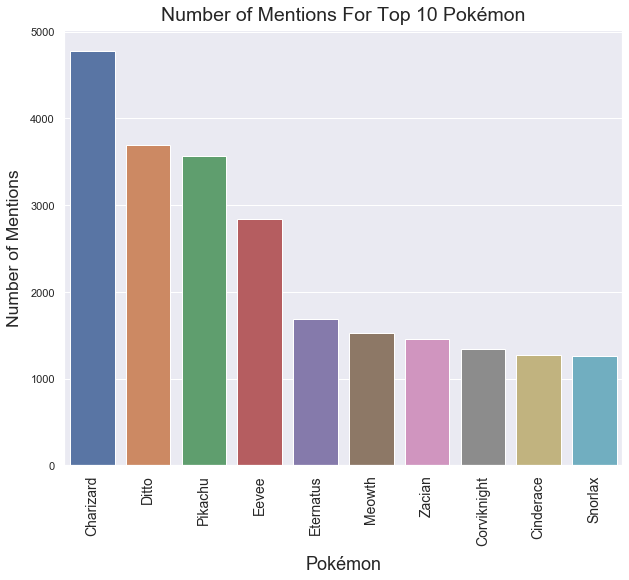

In [75]:
freq_plot2 = sns.barplot(x = list(sorted_dict2.keys())[0:10], y = list(sorted_dict2.values())[0:10])
sns.set_style("darkgrid")#, {'grid.linestyle':'-'})
freq_plot2.set_xticklabels(freq_plot2.get_xticklabels(), rotation = 90, fontdict = {'fontsize':14}) # x-tick label info
freq_plot2.axes.set_title('Number of Mentions For Top 10 Pokémon', fontsize = 19.5, pad = 10) # title info
freq_plot2.set_xlabel('Pokémon', fontsize = 18, labelpad = 10) # xlabel info
freq_plot2.set_ylabel('Number of Mentions', fontsize = 17.5, labelpad = 8) # ylabel info

sns.set(rc = {'figure.figsize':(10,8)})
# plt.show()